In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
cw = pd.read_csv("results/128_class_codewords.csv")
codewords = cw.values[:, 1:]
adv_pc = pd.read_csv("results/128_adv_predicted_codeword.csv", index_col=False)
adv_labels = pd.read_csv("results/128_adv_hamming_distances.csv")
true_pc = pd.read_csv("results/128_predicted_codeword.csv", index_col=False)
true_labels = pd.read_csv("results/128_hamming_distances.csv")

In [23]:
labels.loc[0].values[1:11]

array([65., 72., 72., 53., 60., 63., 56., 58., 63.,  0.])

In [24]:
def get_accuracies(hamming_ratio, codeword_length, labels):
    num_correct_pred = 0
    num_abstain = 0
    num_incorrect_pred = 0
    for i in range(9850):
        #x = pc.loc[i].values[1:]
        #dx = np.sum(np.abs(codewords - x), 1)
        dx = labels.loc[i].values[1:11]
        idy = labels.loc[i].values[11:]
        i = np.argmin(dx)
        if dx[i] <  codeword_length * hamming_ratio:
            if idy[i] == 1:
                num_correct_pred += 1
            else:
                num_incorrect_pred += 1
        else:
            num_abstain += 1
    return num_correct_pred, num_abstain, num_incorrect_pred

In [26]:
get_accuracies(1/8, 128, adv_labels)

(4795, 4842, 213)

In [27]:
get_accuracies(1/8, 128, true_labels)

(9687, 136, 27)

In [33]:
accuracy = []
adv_accuracy = []
ratios = np.arange(0.01, 0.5, 0.01)
for hr in ratios:
    x1, y1, z1 = get_accuracies(hr, 128, labels)
    x2, y2, z2 = get_accuracies(hr, 128, adv_labels)
    accuracy.append( x1 / (x1 + y1 + z1) )
    adv_accuracy.append( (x2 + y2) / (x2 + y2 + z2) )

In [30]:
np.arange(0.1, 0.5, 0.01)

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49])

Text(0.5, 1.0, 'Accuracy vs robustness tradeoff, codeword length 128')

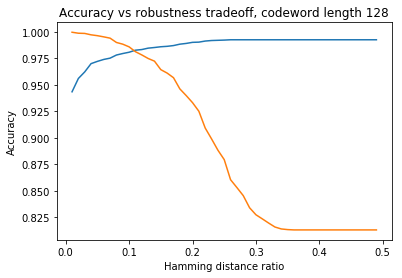

In [37]:
plt.plot(ratios, accuracy)
plt.plot(ratios, adv_accuracy)
plt.xlabel('Hamming distance ratio')
plt.ylabel('Accuracy')
plt.title('Accuracy vs robustness tradeoff, codeword length 128')
plt.savefig('figures/128_hamming_ratio.')